In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
db=pd.read_csv("/content/drive/MyDrive/Collab Dataset/Drug Detection/dev_data_translated (1).csv")

In [ ]:
print(db.head())

         id                                               text  label  \
0   en_2576  @USER________ banana? hot milk? and randomly l...      1   
1   ru_4096  И только вот недавно ближе к двум годам он опя...      0   
2  en_14135  @USER_____ Jim wants your opinion on Exelon st...      0   
3  ru_11007  Папа достал из сумки пачку ксанакса и сказал м...      0   
4  en_11440  @USER___________ i take olanzapine and have a ...      1   

             file_name          origin      type language           split  \
0                  578  previous_SMM4H     tweet       en  SMM4H_25_train   
1            2525808_6          RuDReC  sentence       ru  SMM4H_25_train   
2                15280  previous_SMM4H     tweet       en  SMM4H_25_train   
3  1146417425287733249          RuDReC     tweet       ru  SMM4H_25_train   
4                  490  previous_SMM4H     tweet       en  SMM4H_25_train   

                                     translated_text  
0  @USER________ banana? hot milk? and rand

In [ ]:
import pandas as pd

# Load datasets
train_path = "/content/drive/MyDrive/Collab Dataset/Drug Detection/train_data_translated (1).csv"
dev_path = "/content/drive/MyDrive/Collab Dataset/Drug Detection/dev_data_translated (1).csv"

train_df = pd.read_csv(train_path)
dev_df = pd.read_csv(dev_path)

# Display first few rows
print("Train Data Sample:")
display(train_df.head())

print("Dev Data Sample:")
display(dev_df.head())


Train Data Sample:


,id,text,label,file_name,origin,type,language,split,translated_text
0,en_212,DO U ALWAYS TAKE UR MEDS ON TIME? DO U EVER ST...,0,247,previous_SMM4H,tweet,en,SMM4H_25_dev,DO U ALWAYS TAKE UR MEDS ON TIME? DO U EVER ST...
1,ru_4003,Этот противовирусный препарат очень уменьшает ...,0,641480_11,RuDReC,sentence,ru,SMM4H_25_dev,This antiviral drug greatly reduces the chance...
2,en_589,@USER_ @USER___ just spoke to one source: Gre...,0,655,previous_SMM4H,tweet,en,SMM4H_25_dev,@USER_ @USER___ just spoke to one source: Gre...
3,ru_10539,Ещё один день начался не с ксанакса (((,0,823729794324041732,RuDReC,tweet,ru,SMM4H_25_dev,Another day started off with a different kind ...
4,en_77,"@USER__ too bad buddy, Pfizer needs to sell so...",0,660,previous_SMM4H,tweet,en,SMM4H_25_dev,"@USER__ too bad buddy, Pfizer needs to sell so..."


Dev Data Sample:


,id,text,label,file_name,origin,type,language,split,translated_text
0,en_2576,@USER________ banana? hot milk? and randomly l...,1,578,previous_SMM4H,tweet,en,SMM4H_25_train,@USER________ banana? hot milk? and randomly l...
1,ru_4096,И только вот недавно ближе к двум годам он опя...,0,2525808_6,RuDReC,sentence,ru,SMM4H_25_train,And it wasn't until two years ago that he star...
2,en_14135,@USER_____ Jim wants your opinion on Exelon st...,0,15280,previous_SMM4H,tweet,en,SMM4H_25_train,@USER_____ Jim wants your opinion on Exelon st...
3,ru_11007,Папа достал из сумки пачку ксанакса и сказал м...,0,1146417425287733249,RuDReC,tweet,ru,SMM4H_25_train,Dad took a pack of xanax out of his bag and to...
4,en_11440,@USER___________ i take olanzapine and have a ...,1,490,previous_SMM4H,tweet,en,SMM4H_25_train,@USER___________ i take olanzapine and have a ...


In [ ]:
def preprocess_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special chars
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the Punkt Tokenizer model data

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
train_df["clean_text"] = train_df["translated_text"].apply(preprocess_text)
dev_df["clean_text"] = dev_df["translated_text"].apply(preprocess_text)

In [ ]:

train_df.to_csv("preprocessed_train.csv", index=False)
dev_df.to_csv("preprocessed_dev.csv", index=False)

In [ ]:
train=pd.read_csv("preprocessed_train.csv")

In [ ]:
train

,id,text,label,file_name,origin,type,language,split,translated_text,clean_text
0,en_212,DO U ALWAYS TAKE UR MEDS ON TIME? DO U EVER ST...,0,247,previous_SMM4H,tweet,en,SMM4H_25_dev,DO U ALWAYS TAKE UR MEDS ON TIME? DO U EVER ST...,u always take ur meds time u ever stop wo aski...
1,ru_4003,Этот противовирусный препарат очень уменьшает ...,0,641480_11,RuDReC,sentence,ru,SMM4H_25_dev,This antiviral drug greatly reduces the chance...,antiviral drug greatly reduces chances childre...
2,en_589,@USER_ @USER___ just spoke to one source: Gre...,0,655,previous_SMM4H,tweet,en,SMM4H_25_dev,@USER_ @USER___ just spoke to one source: Gre...,spoke one source green bay area sold imodium a...
3,ru_10539,Ещё один день начался не с ксанакса (((,0,823729794324041732,RuDReC,tweet,ru,SMM4H_25_dev,Another day started off with a different kind ...,another day started different kind xanax
4,en_77,"@USER__ too bad buddy, Pfizer needs to sell so...",0,660,previous_SMM4H,tweet,en,SMM4H_25_dev,"@USER__ too bad buddy, Pfizer needs to sell so...",bad buddy pfizer needs sell sildenafil citrate
...,...,...,...,...,...,...,...,...,...,...
4620,ru_9700,Выбирала между паксилом и бухлом на вечер с вс...,0,951824866407337984,RuDReC,tweet,ru,SMM4H_25_dev,She was choosing between a paxil and a beef fo...,choosing paxil beef evening every snack
4621,de_467,"Liebe <user>, so fühle ich mich auch, wie ein ...",0,227_lifeline_v1_FR_6075_0_1645953239,LREC2022,forum post,de,SMM4H_25_dev,"Dear user, I feel like a child too, but this i...",dear user feel like child crisis doctor silver...
4622,ru_9967,"пацаны, кто-нибудь жрал из вас конвалис, феназ...",0,962006522246021120,RuDReC,tweet,ru,SMM4H_25_dev,"Guys, did anyone eat convals, phenazipes, nodu...",guys anyone eat convals phenazipes nodules bac...
4623,ru_4949,Для меня это много.,0,1086939_15,RuDReC,sentence,ru,SMM4H_25_dev,That's a lot for me.,thats lot


In [ ]:
from google.colab import files
files.download("preprocessed_train.csv")
files.download("preprocessed_dev.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

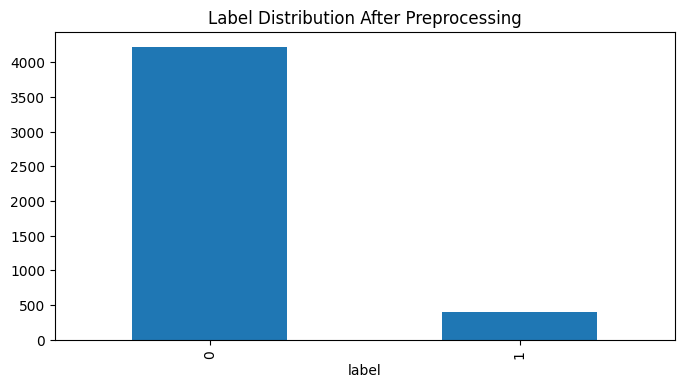

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
train_df["label"].value_counts().plot(kind="bar", title="Label Distribution After Preprocessing")
plt.show()


In [ ]:
# Keep only relevant columns
train_df = train_df[['translated_text', 'label']].dropna()
dev_df = dev_df[['translated_text', 'label']].dropna()

# Check class distribution
print("Train Label Distribution:\n", train_df['label'].value_counts())
print("Dev Label Distribution:\n", dev_df['label'].value_counts())

# Display sample after preprocessing
display(train_df.head(), dev_df.head())

Train Label Distribution:
 label
0    4227
1     398
Name: count, dtype: int64
Dev Label Distribution:
 label
0    28736
1     2451
Name: count, dtype: int64


,translated_text,label
0,DO U ALWAYS TAKE UR MEDS ON TIME? DO U EVER ST...,0
1,This antiviral drug greatly reduces the chance...,0
2,@USER_ @USER___ just spoke to one source: Gre...,0
3,Another day started off with a different kind ...,0
4,"@USER__ too bad buddy, Pfizer needs to sell so...",0


,translated_text,label
0,@USER________ banana? hot milk? and randomly l...,1
1,And it wasn't until two years ago that he star...,0
2,@USER_____ Jim wants your opinion on Exelon st...,0
3,Dad took a pack of xanax out of his bag and to...,0
4,@USER___________ i take olanzapine and have a ...,1


In [ ]:
!pip install transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.7 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load MedBERT tokenizer
model_name = "dmis-lab/biobert-base-cased-v1.1" # MedBERT model from Hugging Face
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Tokenize the dataset
def tokenize_data(data):
    return tokenizer(
        data["translated_text"].tolist(),
        padding=True,
        truncation=True,
        max_length=256,  # Adjust if needed
        return_tensors="pt"
    )

train_encodings = tokenize_data(train_df)
dev_encodings = tokenize_data(dev_df)

# Convert labels to tensors
train_labels = torch.tensor(train_df['label'].values)
dev_labels = torch.tensor(dev_df['label'].values)

# Check tokenized output
print("Example Tokenized Input:", train_encodings['input_ids'][0])


config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

Example Tokenized Input: tensor([  101,  1202,   190,  1579,  1321,   190,  1197,  1143,  3680,  1113,
         1159,   136,  1202,   190,  1518,  1831,   192,   120,   184,  4107,
          190,  1197,  3995,   136,  1303,  1132,  1155,  1103, 11040,  2628,
         1114, 21820,  5132,   113,   189,  1306,   114,   106,   106,  1400,
         1155,  1115,   136,   102,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,    

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

# Create a PyTorch dataset class
class ADE_Dataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx].clone().detach() for key, val in self.encodings.items()}
        item["labels"] = self.labels[idx].clone().detach()
        return item

# Create dataset objects
train_dataset = ADE_Dataset(train_encodings, train_labels)
dev_dataset = ADE_Dataset(dev_encodings, dev_labels)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
dev_loader = DataLoader(dev_dataset, batch_size=16, shuffle=False)

# Check batch shape
batch = next(iter(train_loader))
print({key: value.shape for key, value in batch.items()})

{'input_ids': torch.Size([16, 256]), 'token_type_ids': torch.Size([16, 256]), 'attention_mask': torch.Size([16, 256]), 'labels': torch.Size([16])}


In [ ]:

from transformers import AutoModelForSequenceClassification

# Load model (2 classes, adjust num_labels if needed)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dmis-lab/biobert-base-cased-v1.1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
!pip install evaluate

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 480.4 kB/s eta 0:00:00


In [ ]:
from transformers import TrainingArguments
import evaluate
import numpy as np

# Load accuracy metric
accuracy_metric = evaluate.load("accuracy")

# Define function to compute accuracy
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return accuracy_metric.compute(predictions=predictions, references=labels)

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    logging_dir="./logs",
    logging_steps=10,
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="eval_accuracy",  # Fix: Prefix with 'eval_'
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=dev_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

# Train the model
trainer.train()

<ipython-input-25-20cb3c6cca18>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: championisback88 (championisback88-srm-institute-of-science-and-technology) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy
1,0.270000,0.264339,0.922243
2,0.287500,0.241148,0.903774
3,0.066000,0.290989,0.917915


TrainOutput(global_step=870, training_loss=0.20953591674908825, metrics={'train_runtime': 2158.6677, 'train_samples_per_second': 6.428, 'train_steps_per_second': 0.403, 'total_flos': 1825332946560000.0, 'train_loss': 0.20953591674908825, 'epoch': 3.0})

In [ ]:
results = trainer.evaluate()
print(results)


{'eval_loss': 0.26433855295181274, 'eval_accuracy': 0.9222432423766312, 'eval_runtime': 436.6593, 'eval_samples_per_second': 71.422, 'eval_steps_per_second': 4.466, 'epoch': 3.0}


In [ ]:
model.save_pretrained("./biobert_model")
tokenizer.save_pretrained("./biobert_model")

('./biobert_model/tokenizer_config.json',
 './biobert_model/special_tokens_map.json',
 './biobert_model/vocab.txt',
 './biobert_model/added_tokens.json',
 './biobert_model/tokenizer.json')

In [ ]:
import torch

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Move model to GPU
model.to(device)

# Move encodings and labels to GPU
train_encodings = {key: val.to(device) for key, val in train_encodings.items()}
dev_encodings = {key: val.to(device) for key, val in dev_encodings.items()}
train_labels = train_labels.to(device)
dev_labels = dev_labels.to(device)

# Update dataset class to move batches to GPU
class ADE_Dataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx].clone().detach() for key, val in self.encodings.items()}
        item["labels"] = self.labels[idx].clone().detach()
        return item

# Create DataLoaders
train_dataset = ADE_Dataset(train_encodings, train_labels)
dev_dataset = ADE_Dataset(dev_encodings, dev_labels)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
dev_loader = DataLoader(dev_dataset, batch_size=16, shuffle=False)

# Move DataLoader batches to GPU during training
for batch in train_loader:
    batch = {key: val.to(device) for key, val in batch.items()}
    print({key: value.device for key, value in batch.items()})  # Check if everything is on GPU
    break  # Just checking one batch


Using device: cuda
{'input_ids': device(type='cuda', index=0), 'token_type_ids': device(type='cuda', index=0), 'attention_mask': device(type='cuda', index=0), 'labels': device(type='cuda', index=0)}


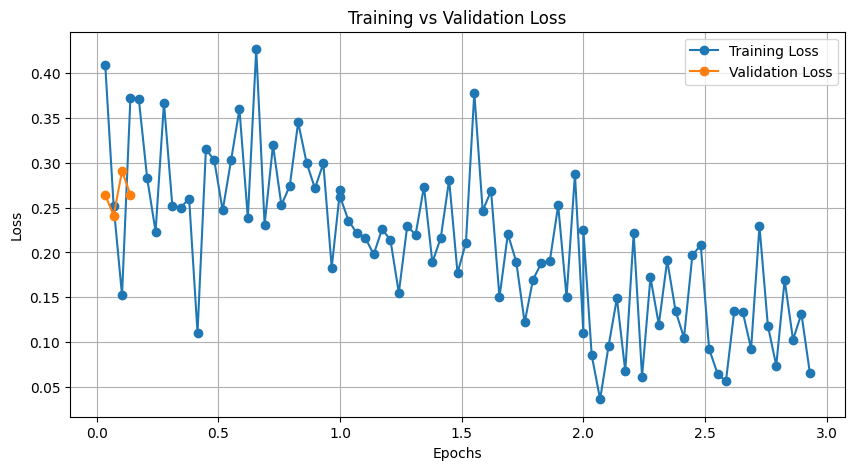

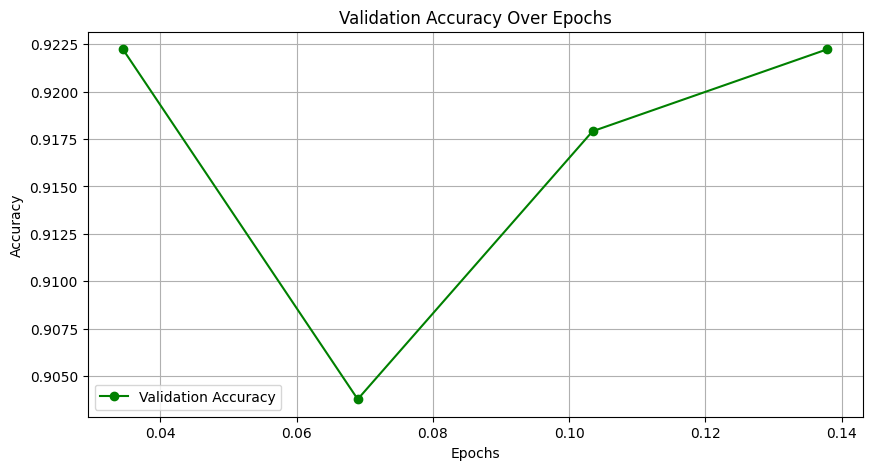

In [ ]:
import matplotlib.pyplot as plt

# Extract training history
train_loss = trainer.state.log_history

# Separate loss and accuracy values
epochs = []
train_losses = []
eval_losses = []
eval_accuracies = []

for log in train_loss:
    if "loss" in log:
        train_losses.append(log["loss"])
    if "epoch" in log:
        epochs.append(log["epoch"])
    if "eval_loss" in log:
        eval_losses.append(log["eval_loss"])
    if "eval_accuracy" in log:
        eval_accuracies.append(log["eval_accuracy"])

# Plot Training vs Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(epochs[:len(train_losses)], train_losses, label="Training Loss", marker="o")
plt.plot(epochs[:len(eval_losses)], eval_losses, label="Validation Loss", marker="o")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid()
plt.show()

# Plot Accuracy (if available)
if eval_accuracies:
    plt.figure(figsize=(10, 5))
    plt.plot(epochs[:len(eval_accuracies)], eval_accuracies, label="Validation Accuracy", marker="o", color="green")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Validation Accuracy Over Epochs")
    plt.legend()
    plt.grid()
    plt.show()


In [ ]:
# Save the model and tokenizer
model.save_pretrained("saved_model")
tokenizer.save_pretrained("saved_model")

('saved_model/tokenizer_config.json',
 'saved_model/special_tokens_map.json',
 'saved_model/vocab.txt',
 'saved_model/added_tokens.json',
 'saved_model/tokenizer.json')

In [ ]:
# Instead of:
# model.save("my_model.h5")  # HDF5 format

# Use this:
model.save_pretrained("my_model") # Saves the model to a directory named "my_model"
tokenizer.save_pretrained("my_model") # Save tokenizer to same directory

('my_model/tokenizer_config.json',
 'my_model/special_tokens_map.json',
 'my_model/vocab.txt',
 'my_model/added_tokens.json',
 'my_model/tokenizer.json')

In [ ]:
!pip install transformers


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import pandas as pd
from tqdm import tqdm

# Load tokenizer and model (PyTorch)
tokenizer = AutoTokenizer.from_pretrained("my_model")
model = AutoModelForSequenceClassification.from_pretrained("my_model")
model.eval()  # Set to evaluation mode

# Load test data
test_df = pd.read_csv("/content/drive/MyDrive/Collab Dataset/Drug Detection/test_data_SMM4H_2025_Task_1_no_labels.csv")

# Prepare batch predictions
predictions = []
batch_size = 32

with torch.no_grad():
    for i in tqdm(range(0, len(test_df), batch_size)):
        texts = test_df['text'][i:i+batch_size].tolist()
        encodings = tokenizer(texts, padding=True, truncation=True, return_tensors="pt", max_length=128)

        outputs = model(**encodings)
        logits = outputs.logits
        batch_preds = torch.argmax(logits, dim=1).tolist()
        predictions.extend(batch_preds)

# Add predictions to dataframe and save
test_df['predicted_label'] = predictions
final_df = test_df[['id', 'predicted_label']]
final_df.to_csv("submission.csv", index=False)


100%|██████████| 726/726 [1:27:41<00:00,  7.25s/it]
